C:\Users\liuji\anaconda3\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


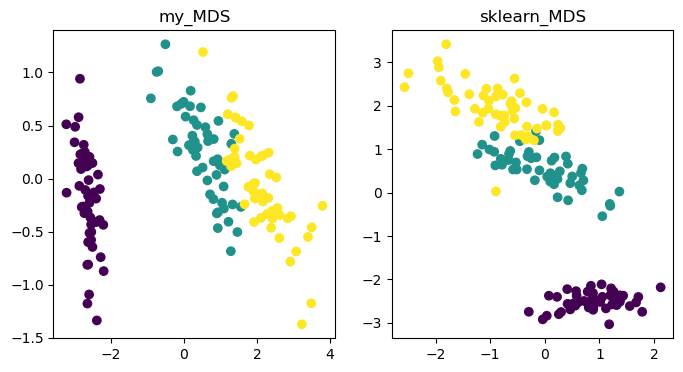

In [14]:
# Method 1
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

def cal_pairwise_dist(x):
    
#     Calculate the pairwise distance, where x is the matrix (a-b)^2 = a^2 + b^2 - 2*a*b
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #Returns the square of the distance between any two points
    return dist


def my_mds(data, n_dims):
    '''

    :param data: (n_samples, n_features)
    :param n_dims: target n_dims
    :return: (n_samples, n_dims)
    '''

    n, d = data.shape
    dist = cal_pairwise_dist(data)
    dist[dist < 0 ] = 0
    T1 = np.ones((n,n))*np.sum(dist)/n**2
    T2 = np.sum(dist, axis = 1, keepdims=True)/n
    T3 = np.sum(dist, axis = 0, keepdims=True)/n

    B = -(T1 - T2 - T3 + dist)/2

    eig_val, eig_vector = np.linalg.eig(B)
    index_ = np.argsort(-eig_val)[:n_dims]
    picked_eig_val = eig_val[index_].real
    picked_eig_vector = eig_vector[:, index_]
    # print(picked_eig_vector.shape, picked_eig_val.shape)
    return picked_eig_vector*picked_eig_val**(0.5)

if __name__ == '__main__':
    iris = load_iris()#testing data
    data = iris.data
    Y = iris.target
    data_1 = my_mds(data, 2)

    data_2 = MDS(n_components=2).fit_transform(data)

    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("my_MDS")
    plt.scatter(data_1[:, 0], data_1[:, 1], c=Y)

    plt.subplot(122)
    plt.title("sklearn_MDS")
    plt.scatter(data_2[:, 0], data_2[:, 1], c=Y)
#     plt.savefig("MDS_1.png")
    plt.show()

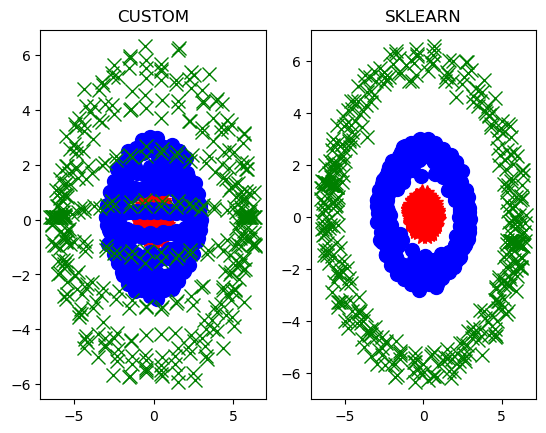

In [15]:
# Method 2
# Two datasets are used here: the spherical data set Iris dataset
# and the algorithm uses the algorithm based on the above inner product optimization algorithm and the algorithm based on gradient descent in sklearn, 
# and compares them, in general, the latter is stable, and the former is faster
import numpy
from sklearn import metrics,datasets,manifold
from scipy import optimize
from matplotlib import pyplot
import pandas
import collections
 
def generate_circle_data():
    xx=numpy.zeros((1200,3))
    x1=numpy.ones((400,))+0.5*numpy.random.rand(400)-0.5
    r1=numpy.linspace(0,2*numpy.pi,20)
    r2=numpy.linspace(0,numpy.pi,20)
    r1,r2=numpy.meshgrid(r1,r2)
    r1=r1.ravel()
    r2=r2.ravel()
    xx[0:400,0]=x1*numpy.sin(r1)*numpy.sin(r2)
    xx[0:400,1]=x1*numpy.cos(r1)*numpy.sin(r2)
    xx[0:400,2]=x1*numpy.cos(r2)
    x1=3*numpy.ones((400,))+0.6*numpy.random.rand(400)-0.6
    xx[400:800,0]=x1*numpy.sin(r1)*numpy.sin(r2)
    xx[400:800,1]=x1*numpy.cos(r1)*numpy.sin(r2)
    xx[400:800,2]=x1*numpy.cos(r2)
    x1=6*numpy.ones((400,))+1.1*numpy.random.rand(400)-0.6
    xx[800:1200,0]=x1*numpy.sin(r1)*numpy.sin(r2)
    xx[800:1200,1]=x1*numpy.cos(r1)*numpy.sin(r2)
    xx[800:1200,2]=x1*numpy.cos(r2)
    target=numpy.zeros((1200,))
    target[0:400]=0
    target[400:800]=1
    target[800:1200]=2
    target=target.astype('int')
    return xx,target
 
 
def get_data():
    data=datasets.load_iris()
    return data.data,data.target
 
def calculate_distance(x,y):
    d=numpy.sqrt(numpy.sum((x-y)**2))
    return d
 
def calculate_distance_matrix(x,y):
    d=metrics.pairwise_distances(x,y)
    return d
 
def cal_B(D):
    (n1,n2)=D.shape
    DD=numpy.square(D)
    Di=numpy.sum(DD,axis=1)/n1
    Dj=numpy.sum(DD,axis=0)/n1
    Dij=numpy.sum(DD)/(n1**2)
    B=numpy.zeros((n1,n1))
    for i in range(n1):
        for j in range(n2):
            B[i,j]=(Dij+DD[i,j]-Di[i]-Dj[j])/(-2)
    return B
    
 
def MDS(data,n=2):
    D=calculate_distance_matrix(data,data)
    B=cal_B(D)
    Be,Bv=numpy.linalg.eigh(B)
    # print numpy.sum(B-numpy.dot(numpy.dot(Bv,numpy.diag(Be)),Bv.T))
    Be_sort=numpy.argsort(-Be)
    Be=Be[Be_sort]
    Bv=Bv[:,Be_sort]
    Bez=numpy.diag(Be[0:n])
    # print Bez
    Bvz=Bv[:,0:n]
    Z=numpy.dot(numpy.sqrt(Bez),Bvz.T).T
    return Z
 
 
def test_iris():
    data,target=get_data()
    Z=MDS(data)
    
    figure1=pyplot.figure()
    pyplot.subplot(1,2,1)
    pyplot.plot(Z[target==0,0],Z[target==0,1],'r*',markersize=20)
    pyplot.plot(Z[target==1,0],Z[target==1,1],'bo',markersize=20)
    pyplot.plot(Z[target==2,0],Z[target==2,1],'gx',markersize=20)
    pyplot.title('CUSTOM')
    pyplot.subplot(1,2,2)
    Z1=manifold.MDS(n_components=2).fit_transform(data)
    pyplot.plot(Z1[target==0,0],Z1[target==0,1],'r*',markersize=20)
    pyplot.plot(Z1[target==1,0],Z1[target==1,1],'bo',markersize=20)
    pyplot.plot(Z1[target==2,0],Z1[target==2,1],'gx',markersize=20)
    pyplot.title('SKLEARN')
    pyplot.show()
 
def test_ball():
    data,target=generate_circle_data()
    Z=MDS(data)
    figure1=pyplot.figure()
    pyplot.subplot(1,2,1)
    pyplot.plot(Z[target==0,0],Z[target==0,1],'r*',markersize=10)
    pyplot.plot(Z[target==1,0],Z[target==1,1],'bo',markersize=10)
    pyplot.plot(Z[target==2,0],Z[target==2,1],'gx',markersize=10)
    pyplot.title('CUSTOM')
    pyplot.subplot(1,2,2)
    Z1=manifold.MDS(n_components=2).fit_transform(data)
    pyplot.plot(Z1[target==0,0],Z1[target==0,1],'r*',markersize=10)
    pyplot.plot(Z1[target==1,0],Z1[target==1,1],'bo',markersize=10)
    pyplot.plot(Z1[target==2,0],Z1[target==2,1],'gx',markersize=10)
    pyplot.title('SKLEARN')
    pyplot.show()
 
if __name__=='__main__':
    test_ball()
#     test_iris()
 
 